In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import FactorAnalysis

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
def build_model(target,
                features,
                dataset,
                n_components):
    
    X = dataset[features]
    y = dataset[target]
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    factor_analysis = FactorAnalysis(n_components = n_components, random_state=10)
    factor_analysis.fit(x_train, y_train)    
    x_train = factor_analysis.transform(x_train) 

    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)
    
    x_test = factor_analysis.transform(x_test)
    y_pred = model.predict(x_test)
    
    return {
        'factor_analysis_obj': factor_analysis,
        'X_transform': x_train,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
    }

## Train models for different number of factors

In [4]:
for i in range (1, data.drop(columns=['Outcome']).shape[1]):
    res = build_model('Outcome',
                      data.drop(columns=['Outcome']).columns,
                      data,
                      i
                     )
    print(f"Score for {i} componenets: accuracy - {res['accuracy']:.2f}, precision - {res['precision']:.2f}, recall - {res['recall']:.2f}")

Score for 1 componenets: accuracy - 0.71, precision - 0.75, recall - 0.06
Score for 2 componenets: accuracy - 0.80, precision - 0.71, recall - 0.57
Score for 3 componenets: accuracy - 0.80, precision - 0.71, recall - 0.57
Score for 4 componenets: accuracy - 0.75, precision - 0.62, recall - 0.51
Score for 5 componenets: accuracy - 0.76, precision - 0.62, recall - 0.53
Score for 6 componenets: accuracy - 0.80, precision - 0.69, recall - 0.62
Score for 7 componenets: accuracy - 0.81, precision - 0.74, recall - 0.60


In [5]:
res['factor_analysis_obj'].noise_variance_

array([0.99994583, 0.99999975, 0.99999992, 0.99999318, 0.99999992,
       0.99999343, 0.10345736, 0.99999464])

## Visualize first 2 factors

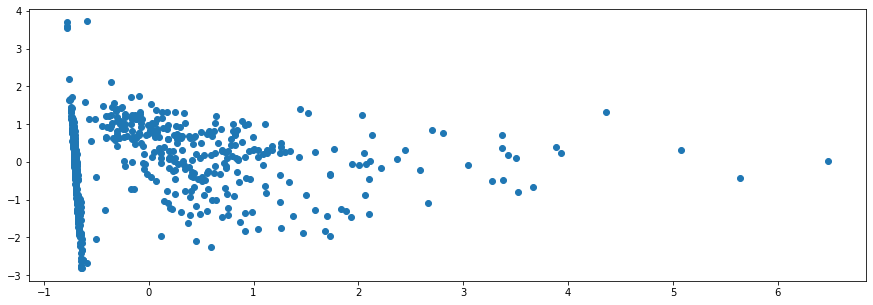

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(res['X_transform'].transpose()[0], res['X_transform'].transpose()[1]);

There is variation